# Data Preprocessing

In [ ]:
# PLEASE RUN THE CODE FROM TOP DOWN

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [2]:
# Checking for missing values in the dataset
missing_values = test_df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

id                           0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
title_embedding              0
average_degree_centrality    0
dtype: int64


In [3]:
# Class distribution
unique, counts = np.unique(train_df['imdb_score_binned'], return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{0: 24, 1: 235, 2: 1839, 3: 777, 4: 129}


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

""" Preprocessing Training Data """

genre_train = np.load("features_doc2vec/train_doc2vec_features_genre.npy")
plot_keywords_train = np.load("features_doc2vec/train_doc2vec_features_plot_keywords.npy")
title_train = np.load("features_fasttext/train_fasttext_title_embeddings.npy")

# Encode categorical data
ohe_language = OneHotEncoder(handle_unknown = 'ignore')
ohe_country = OneHotEncoder(handle_unknown = 'ignore')
ohe_content_rating = OneHotEncoder(handle_unknown = 'ignore')
language_train = ohe_language.fit_transform(train_df[['language']]).toarray()
country_train = ohe_country.fit_transform(train_df[['country']]).toarray()
content_rating_train = ohe_content_rating.fit_transform(train_df[['content_rating']]).toarray()

In [5]:
simple_train_df = train_df.drop(['id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'movie_title', 
               'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'], axis=1)
train_df = simple_train_df.copy()

In [7]:
# Find correlation between continuous features
correlation_matrix = simple_train_df.drop('imdb_score_binned', axis=1).corr()
print(correlation_matrix)

                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.233593   
duration                                 0.233593  1.000000   
director_facebook_likes                  0.173238  0.175870   
actor_3_facebook_likes                   0.250428  0.124426   
actor_1_facebook_likes                   0.156197  0.079785   
gross                                    0.459377  0.266438   
num_voted_users                          0.580511  0.345424   
cast_total_facebook_likes                0.225191  0.115516   
facenumber_in_poster                    -0.031220  0.021318   
num_user_for_reviews                     0.547682  0.360218   
title_year                               0.417861 -0.127640   
actor_2_facebook_likes                   0.247378  0.124402   
movie_facebook_likes                     0.706790  0.207761   
average_degree_centrality                0.237633  0.252224   

                           director_facebook_likes  ac

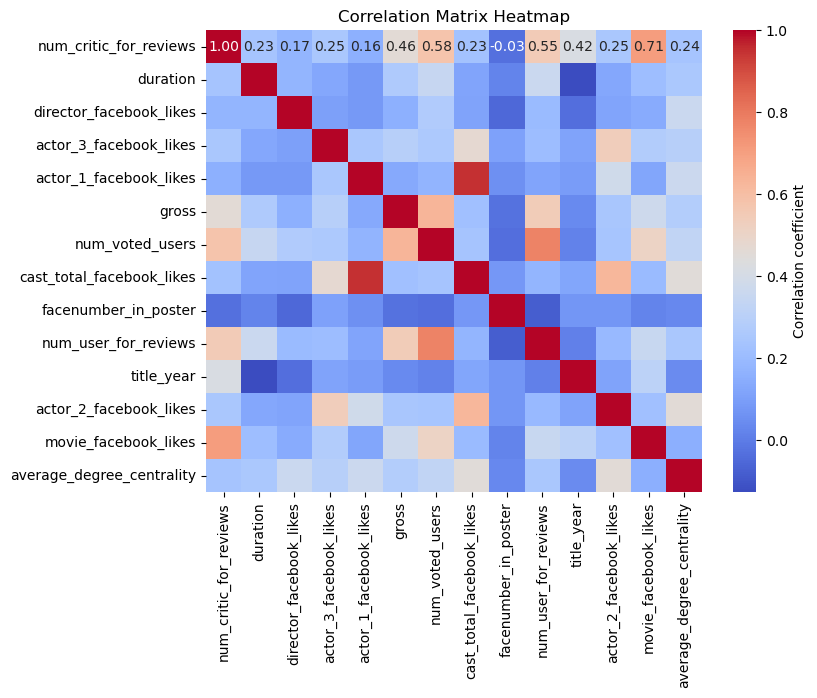

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()

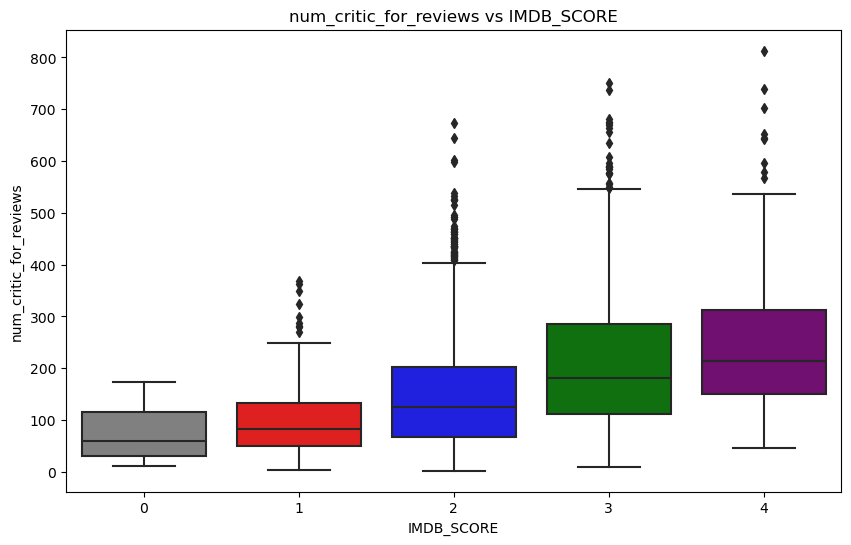

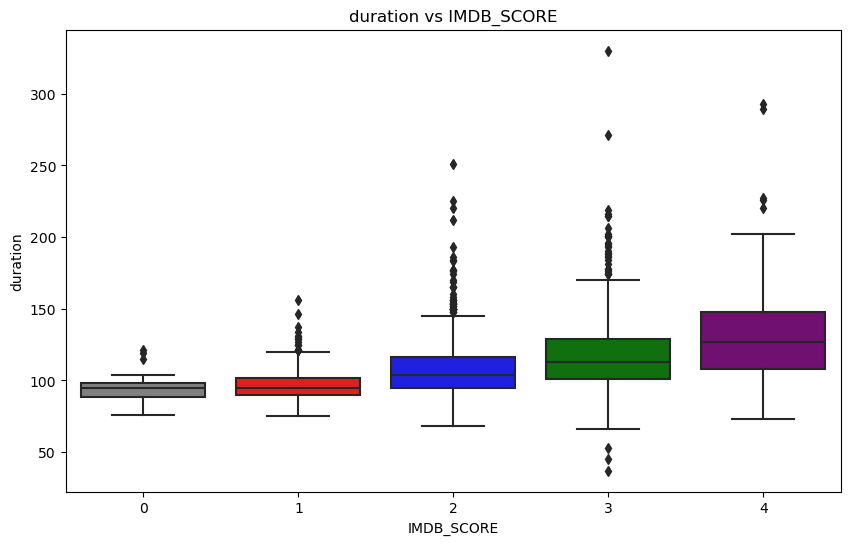

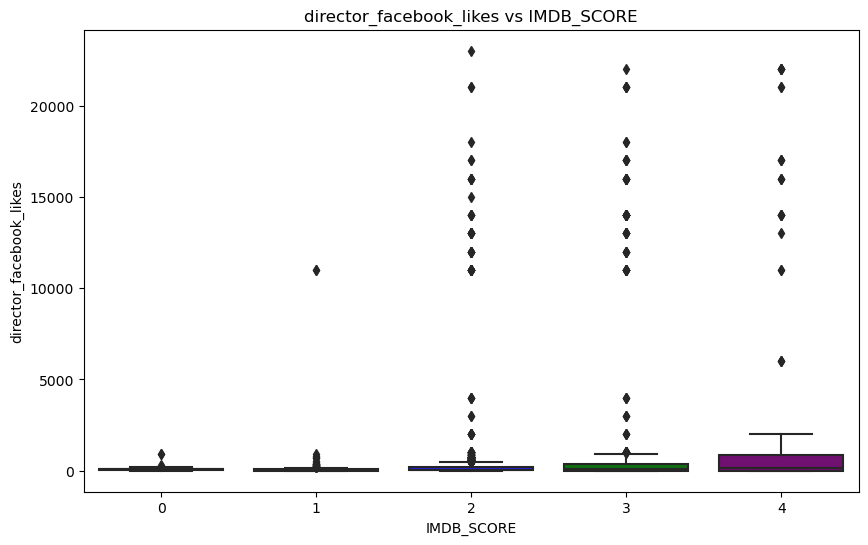

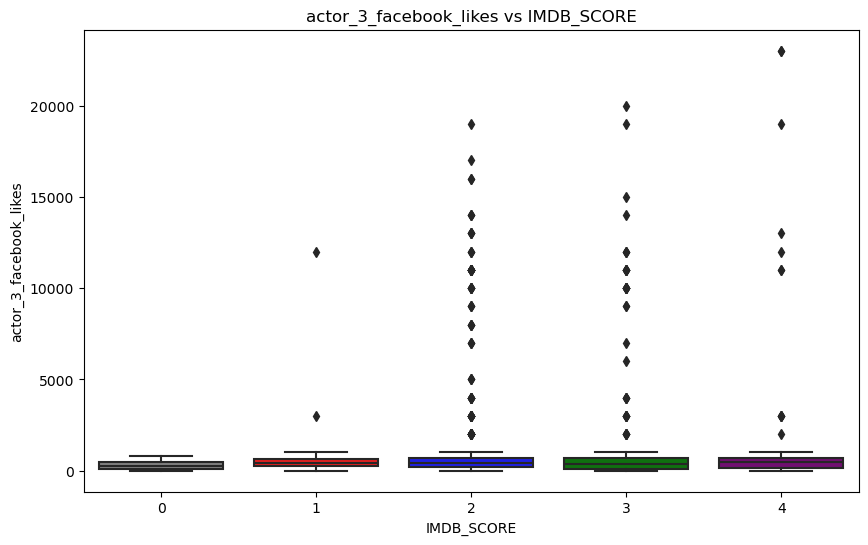

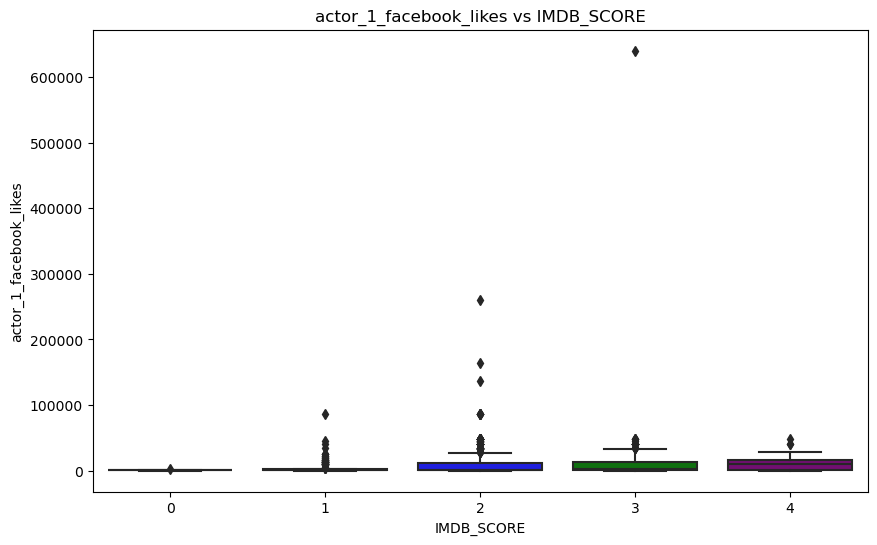

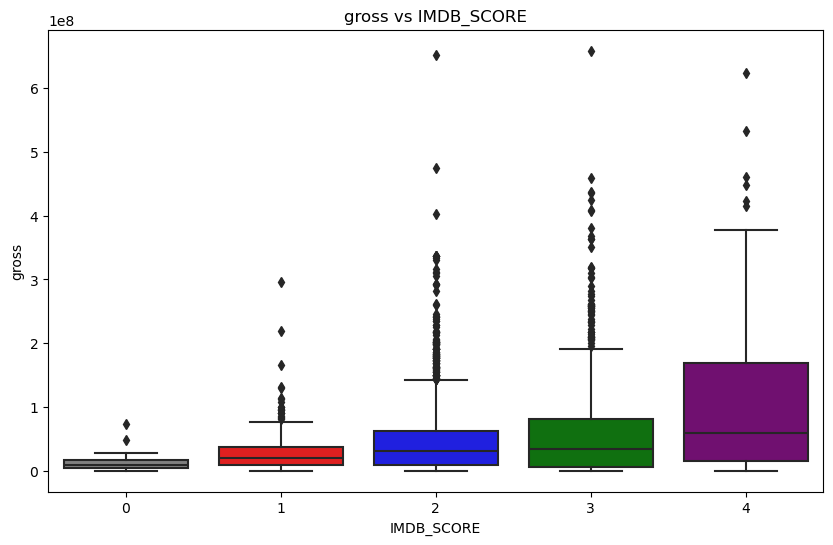

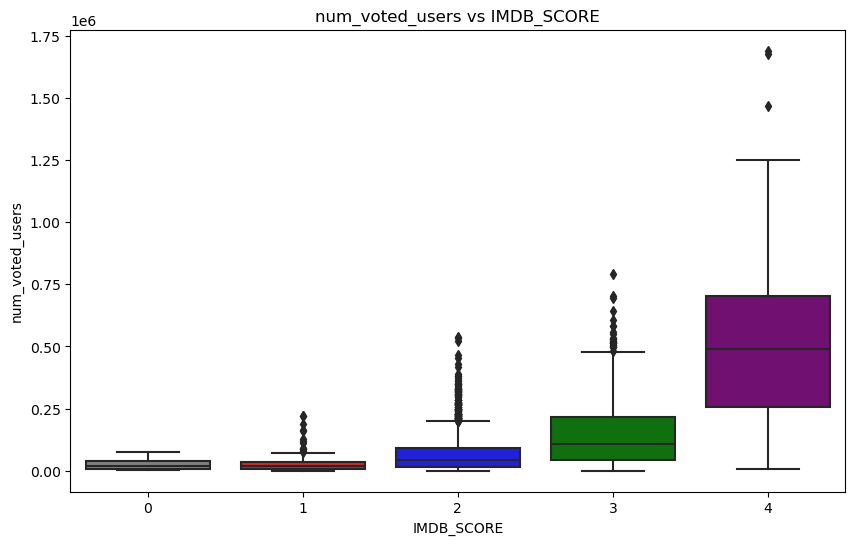

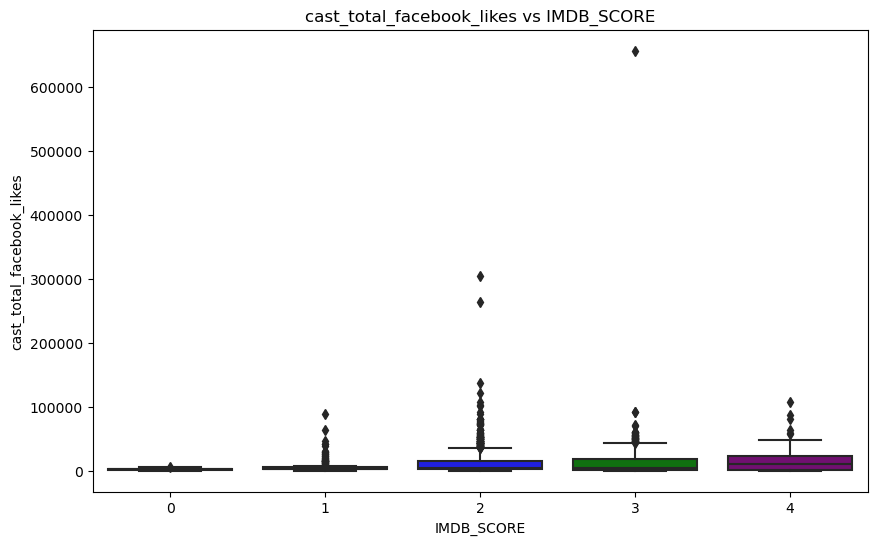

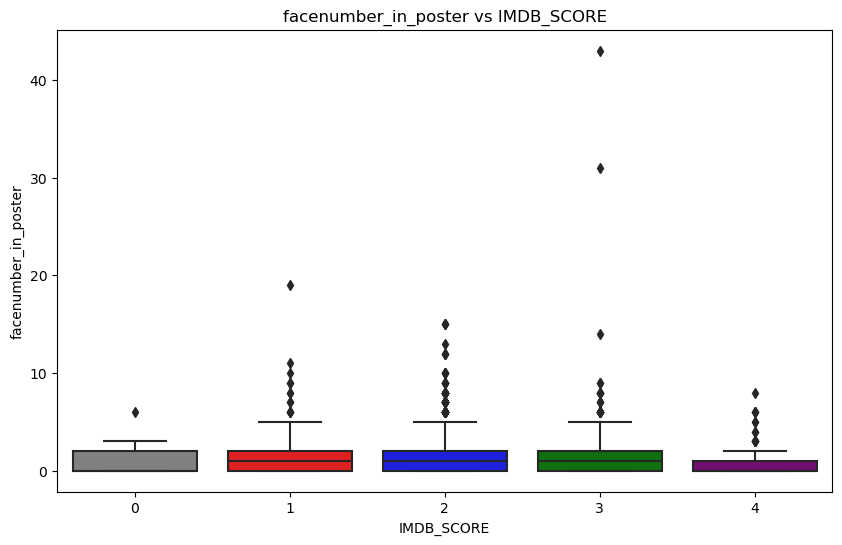

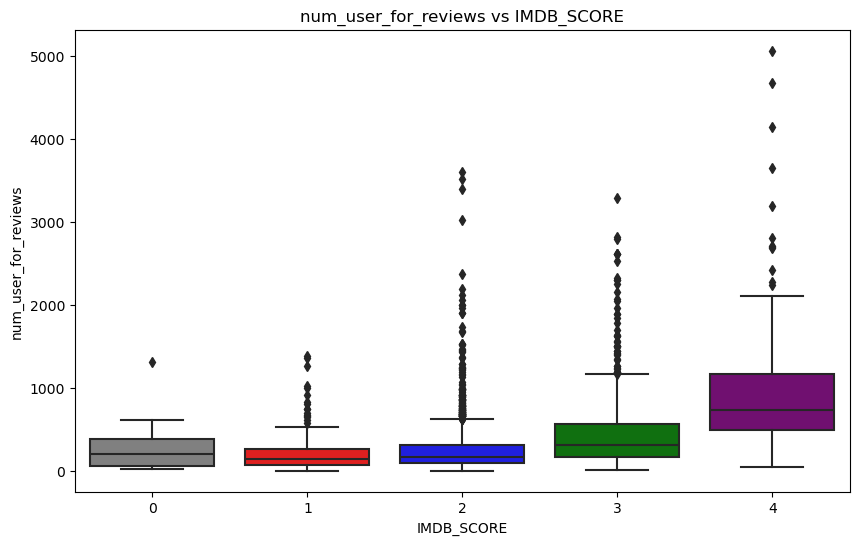

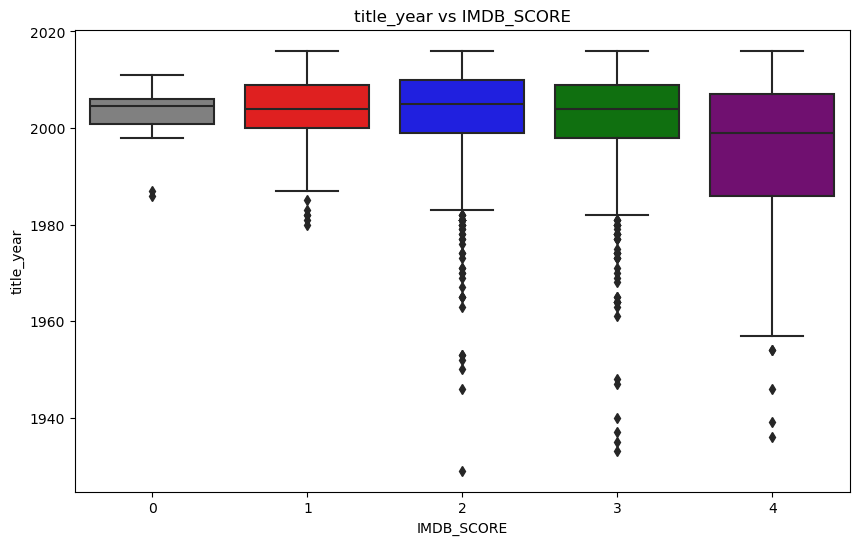

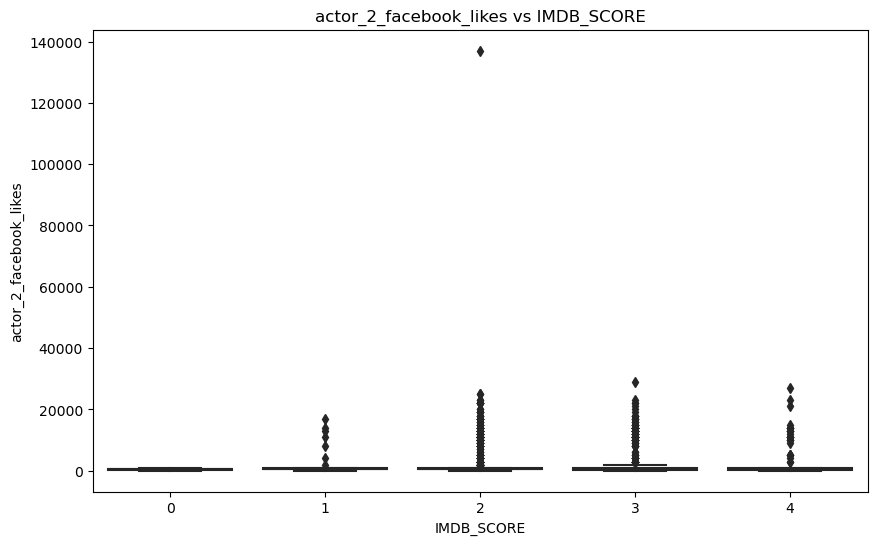

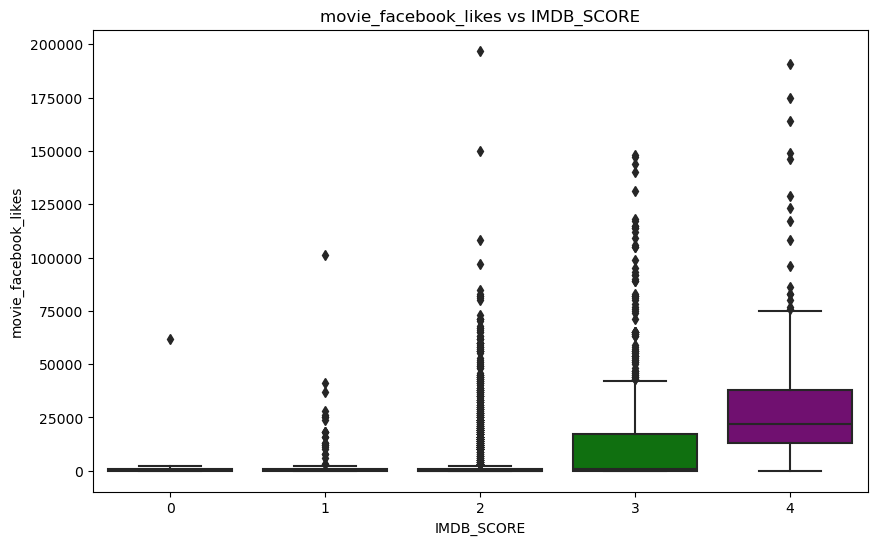

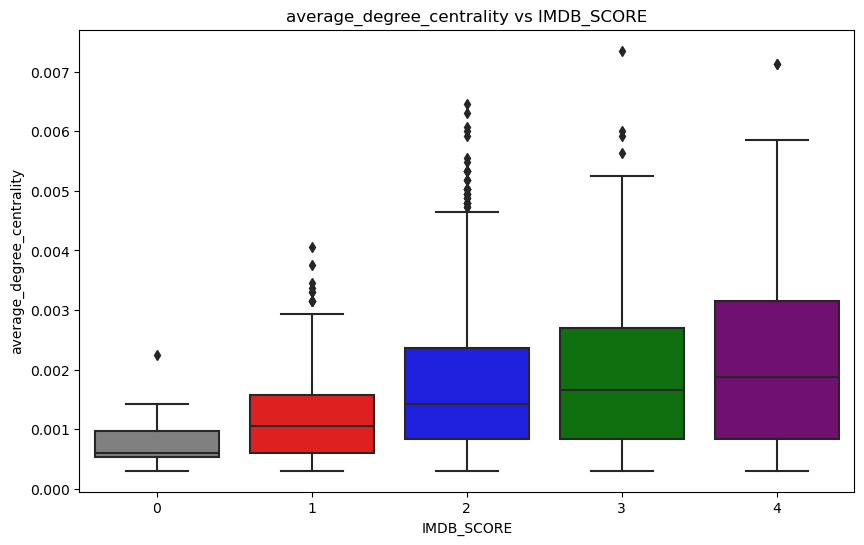

In [9]:
# Find correlation between features and label
palette = {0: 'gray', 1: 'red', 2: 'blue', 3: 'green', 4: 'purple'}

for feature in simple_train_df.columns:
    if feature != 'imdb_score_binned':
        plt.figure(figsize=(10, 6))
        # Create a box plot
        sns.boxplot(x=simple_train_df['imdb_score_binned'], y=simple_train_df[feature], palette=palette)
        plt.title(f'{feature} vs IMDB_SCORE')
        plt.xlabel('IMDB_SCORE')
        plt.ylabel(feature)
        # Save the plot to a file
        plt.savefig(f"output/{feature}_vs_IMDB_SCORE.png")
        plt.show()

In [10]:
# Dimensionality reduction for text features, aim for cummulative sum of reduced variance ratio is 0.9+
genre_train_df = pd.DataFrame(genre_train)
pca_genre = PCA(n_components=75)
genre_train_df = pca_genre.fit_transform(genre_train_df)
print("Genre: ", pca_genre.explained_variance_ratio_.sum())

plot_keywords_train_df = pd.DataFrame(plot_keywords_train)

title_train_df = pd.DataFrame(title_train)
pca_title = PCA(n_components=75)
title_train_df = pca_title.fit_transform(title_train_df)
print("Title: ", pca_title.explained_variance_ratio_.sum())

Genre:  0.9289639
Title:  0.9336075


In [11]:
language_train_df = pd.DataFrame(language_train)
pca_language = PCA(n_components=10)
language_train_df = pca_language.fit_transform(language_train_df)
print("Language: ", pca_language.explained_variance_ratio_.sum())

country_train_df = pd.DataFrame(country_train)
pca_country = PCA(n_components=10)
country_train_df = pca_country.fit_transform(country_train_df)
print("Country: ", pca_country.explained_variance_ratio_.sum())

content_rating_train_df = pd.DataFrame(content_rating_train)
pca_content = PCA(n_components = 5)
content_rating_train_df = pca_content.fit_transform(content_rating_train_df)
print("Content: ", pca_content.explained_variance_ratio_.sum())

Language:  0.8688854937179283
Country:  0.9228091764516079
Content:  0.982531685564849


In [12]:
# Creating new features for text features
genre_features = ['genre_' + str(i + 1) for i in range(genre_train_df.shape[1])]
plot_keywords_features = ['plot_keywords_' + str(i + 1) for i in range(plot_keywords_train_df.shape[1])]
title_features = ['title_' + str(i + 1) for i in range(title_train_df.shape[1])]

language_features = ['language_' + str(i + 1) for i in range(language_train_df.shape[1])]
country_features = ['country_' + str(i + 1) for i in range(country_train_df.shape[1])]
content_rating_features = ['content_rating_' + str(i + 1) for i in range(content_rating_train_df.shape[1])]

In [13]:
# Add new features to dataset
train_df[genre_features] = pd.DataFrame(genre_train_df, index=train_df.index)
train_df[plot_keywords_features] = pd.DataFrame(plot_keywords_train_df, index=train_df.index)
train_df[title_features] = pd.DataFrame(title_train_df, index=train_df.index)

train_df[language_features] = pd.DataFrame(language_train_df, index=train_df.index)
train_df[country_features] = pd.DataFrame(country_train_df, index=train_df.index)
train_df[content_rating_features] = pd.DataFrame(content_rating_train_df, index=train_df.index)

/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/2271941705.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[plot_keywords_features] = pd.DataFrame(plot_keywords_train_df, index=train_df.index)
/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/2271941705.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[plot_keywords_features] = pd.DataFrame(plot_keywords_train_df, index=train_df.index)
/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/2271941705.py:3: Performa

In [14]:
""" Preprocessing Test Data """

genre_test = np.load("features_doc2vec/test_doc2vec_features_genre.npy")
plot_keywords_test = np.load("features_doc2vec/test_doc2vec_features_plot_keywords.npy")
title_test = np.load("features_fasttext/test_fasttext_title_embeddings.npy")

# Encode categorical data
language_test = ohe_language.transform(test_df[['language']]).toarray()
country_test = ohe_country.transform(test_df[['country']]).toarray()
content_rating_test = ohe_content_rating.transform(test_df[['content_rating']]).toarray()

In [15]:
genre_test_df = pd.DataFrame(genre_test)
genre_test_df = pca_genre.transform(genre_test_df)

plot_keywords_test_df = pd.DataFrame(plot_keywords_test)

title_test_df = pd.DataFrame(title_test)
title_test_df = pca_title.transform(title_test_df)

In [16]:
language_test_df = pd.DataFrame(language_test)
language_test_df = pca_language.transform(language_test_df)

country_test_df = pd.DataFrame(country_test)
country_test_df = pca_country.transform(country_test_df)

content_rating_test_df = pd.DataFrame(content_rating_test)
content_rating_test_df = pca_content.transform(content_rating_test_df)

In [17]:
simple_test_df = test_df.drop(['id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'movie_title', 
               'plot_keywords', 'language', 'country', 'content_rating', 'title_embedding'], axis=1)
test_df = simple_test_df.copy()

test_df[genre_features] = pd.DataFrame(genre_test_df, index=test_df.index)
test_df[plot_keywords_features] = pd.DataFrame(plot_keywords_test_df, index=test_df.index)
test_df[title_features] = pd.DataFrame(title_test_df, index=test_df.index)

test_df[language_features] = pd.DataFrame(language_test_df, index=test_df.index)
test_df[country_features] = pd.DataFrame(country_test_df, index=test_df.index)
test_df[content_rating_features] = pd.DataFrame(content_rating_test_df, index=test_df.index)

/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/3528272032.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[plot_keywords_features] = pd.DataFrame(plot_keywords_test_df, index=test_df.index)
/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/3528272032.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[plot_keywords_features] = pd.DataFrame(plot_keywords_test_df, index=test_df.index)
/var/folders/fl/t1q3j3rn0dg278fhg2bvg0dw0000gn/T/ipykernel_47663/3528272032.py:6: PerformanceWar

In [18]:
# Data after pre-processing
X_train = train_df.drop('imdb_score_binned', axis=1)
y_train = train_df['imdb_score_binned']
X_test = test_df

In [19]:
def remove_outliers(df, cq1, cq3):
    # Loop over all columns
    for column in df.columns:
        if (column == 'imdb_score_binned'):
            continue
        Q1 = df[column].quantile(cq1)
        Q3 = df[column].quantile(cq3)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [20]:
# Data after pre-processing and removing outliers cq1 = 0.005, cq3 = 0.995
train_df_nos = remove_outliers(train_df, 0.005, 0.995)
X_train_nos = train_df_nos.drop('imdb_score_binned', axis=1)
y_train_nos = train_df_nos['imdb_score_binned']

# Training and Testing

In [21]:
# Try out Decision Tree, Bagging and Boosting

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import svm

In [23]:
# Try simple Decision Tree model with no additional features

In [24]:
X_train_simple = simple_train_df.drop('imdb_score_binned', axis=1)

In [25]:
print("1R acc:", np.mean(cross_val_score(DecisionTreeClassifier(max_depth=1), X_train_simple, y_train, cv=5)))

1R acc: 0.631832501386578


In [26]:
print("DT acc:", np.mean(cross_val_score(DecisionTreeClassifier(max_depth=None), X_train_simple, y_train, cv=5)))

DT acc: 0.6078563505268997


In [27]:
# With additional features

In [28]:
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
one_r_acc = np.mean(cross_val_score(one_r, X_train, y_train, cv=5))
dt_acc = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
print("1-R accuracy: {}; DT accuracy: {}".format(one_r_acc, dt_acc))

1-R accuracy: 0.631832501386578; DT accuracy: 0.5788885191347755


In [30]:
baseline_prediction = one_r.predict(X_test)
prediction_simple_dt = dt.predict(X_test) # 0

In [70]:
prediction_1R_df = pd.DataFrame({
    'id': range(1, len(baseline_prediction) + 1),
    'imdb_score_binned': baseline_prediction
})

# Save the DataFrame to a CSV file
prediction_1R_df.to_csv('prediction_1R.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [70]:
prediction_dt_df = pd.DataFrame({
    'id': range(1, len(prediction_dt) + 1),
    'imdb_score_binned': prediction_dt
})

# Save the DataFrame to a CSV file
prediction_dt_df.to_csv('prediction_dt.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [31]:
# Hyperparameter Tuning for DT
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10, 20, 30, None],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best score: 0.6401331114808653


In [32]:
tuned_dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random')
tuned_dt.fit(X_train, y_train)
prediction_tuned_dt = tuned_dt.predict(X_test) # 4

In [70]:
prediction_tuned_dt_df = pd.DataFrame({
    'id': range(1, len(prediction_tuned_dt) + 1),
    'imdb_score_binned': prediction_tuned_dt
})

# Save the DataFrame to a CSV file
prediction_tuned_dt_df.to_csv('prediction_tuned_dt.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [33]:
# Trying out SVM

In [34]:
np.mean(cross_val_score(svm.SVC(kernel='rbf'), X_train_simple, y_train, cv=5))

0.6145152523571824

In [35]:
np.mean(cross_val_score(svm.SVC(kernel='rbf'), X_train, y_train, cv=5))

0.6145152523571824

In [36]:
# SVM doesn't perform well as data is too overlapped

In [37]:
# Find the best number of features in subset with DT
pipeline = Pipeline([ 
    ('select_features', SelectKBest(score_func=mutual_info_classif)), 
    ('classifier', DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random'))
])

param_grid_fs = {
    'select_features__k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # Example values for k
}

grid_search_fs = GridSearchCV(pipeline, param_grid_fs, cv=5, scoring='accuracy', verbose=1)
grid_search_fs.fit(X_train, y_train)  # Assume X_train and y_train are defined
print("Best parameters:", grid_search_fs.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_fs.best_score_))
# The result is not very reliable, I'll chose 70

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'select_features__k': 80}
Best cross-validation score: 0.66


In [38]:
# Feature selection
mi = SelectKBest(score_func=mutual_info_classif, k=70)
X_train_fs = mi.fit_transform(X_train, y_train)
X_test_fs = mi.transform(X_test)

In [39]:
# Bagging with tuned DT
from sklearn.ensemble import BaggingClassifier
bagging_dt_gs = BaggingClassifier()
param_grid_bagging = {'estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random')], 
                      'n_estimators': [10, 20, 50, 100, 200],
                      'max_samples': [0.2, 0.5, 0.8],
                      'max_features': [0.2, 0.5, 0.8]
                     }
grid_search_bagging = GridSearchCV(estimator=bagging_dt_gs, param_grid=param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train_fs, y_train)

print("Best parameters:", grid_search_bagging.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_bagging.best_score_))

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=10, splitter='random'), 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}
Best cross-validation score: 0.70


In [40]:
bagging_dt_gs = BaggingClassifier(estimator=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random'),
                                  n_estimators=200,
                                  max_features=0.8, 
                                  max_samples=0.8, 
                                 )
bagging_dt_gs.fit(X_train_fs, y_train)
prediction_bagging_dt_gs = bagging_dt_gs.predict(X_test_fs) # 6

In [70]:
prediction_bagging_dt_gs_df = pd.DataFrame({
    'id': range(1, len(prediction_bagging_dt_gs) + 1),
    'imdb_score_binned': prediction_bagging_dt_gs
})

# Save the DataFrame to a CSV file
prediction_bagging_dt_gs_df.to_csv('prediction_bagging_dt_gs.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [41]:
# Boosting with tuned DT
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
param_grid_ada = {'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random'), DecisionTreeClassifier(max_depth=None)],
                 'n_estimators': [50, 100, 200],
                 'random_state': [42, None]}
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train_fs, y_train)

print("Best parameters:", grid_search_ada.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=10, splitter='random'), 'n_estimators': 200, 'random_state': None}
Best cross-validation score: 0.68


In [42]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10, splitter='random'), n_estimators=200)
ada.fit(X_train_fs, y_train)
prediction_ada = ada.predict(X_test_fs) # 7

In [70]:
prediction_ada_df = pd.DataFrame({
    'id': range(1, len(prediction_ada) + 1),
    'imdb_score_binned': prediction_ada
})

# Save the DataFrame to a CSV file
prediction_ada_df.to_csv('prediction_ada.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [43]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler();
X_train_scaled = scaler.fit_transform(X_train)

stdizer = StandardScaler()
X_train_std = stdizer.fit_transform(X_train)

In [44]:
# Try out KNN with hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [i for i in range(1, 200, 2)],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'cosine', 'manhattan']
                 }
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_std, y_train)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
# Not reliable, choose 25

Best parameters: {'metric': 'cosine', 'n_neighbors': 19, 'weights': 'distance'}
Best cross-validation score: 0.66


In [45]:
grid_search_knn.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
# So we will use standardizer instead of min-max scaler

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.63


In [48]:
# Find best number of features
pipeline_25nn = Pipeline([ 
    ('select_features', SelectKBest(score_func=mutual_info_classif)), 
    ('classifier', KNeighborsClassifier(n_neighbors=25, weights='distance', metric='cosine'))
])

grid_search_knn_fs = GridSearchCV(pipeline_25nn, param_grid=param_grid_fs, cv=5, scoring='accuracy')
grid_search_knn_fs.fit(X_train_std, y_train)

print("Best parameters:", grid_search_knn_fs.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn_fs.best_score_))
# Not reliable, choose 10

Best parameters: {'select_features__k': 80}
Best cross-validation score: 0.67


In [49]:
# Feature selection
knn_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_std_fs = knn_selector.fit_transform(X_train_std, y_train)
X_test_std_fs = knn_selector.transform(stdizer.transform(X_test))

knn_best = KNeighborsClassifier(n_neighbors=25, weights='distance', metric='cosine')

In [50]:
knn_best.fit(X_train_std_fs, y_train)
prediction_knn = knn_best.predict(X_test_std_fs)

In [70]:
prediction_knn_df = pd.DataFrame({
    'id': range(1, len(prediction_knn) + 1),
    'imdb_score_binned': prediction_knn
})

# Save the DataFrame to a CSV file
prediction_knn_df.to_csv('prediction_knn.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
np.mean(cross_val_score(rf, X_train_std_fs, y_train, cv=5))

0.6900831946755407

In [52]:
# Stacking
from sklearn.ensemble import StackingClassifier
stacked_estimators = [
    ('ada', ada),
    ('knn', knn_best),
    ('bagging_dt_gs', bagging_dt_gs)
]
stacking = StackingClassifier(estimators=stacked_estimators, final_estimator=rf, cv=5)
np.mean(cross_val_score(stacking, X_train_std_fs, y_train, cv=5))

0.6920820854132002

In [53]:
stacking.fit(X_train_std_fs, y_train)
prediction_stacking = stacking.predict(X_test_std_fs) # 9

In [70]:
prediction_stacking_df = pd.DataFrame({
    'id': range(1, len(prediction_stacking) + 1),
    'imdb_score_binned': prediction_stacking
})

# Save the DataFrame to a CSV file
prediction_stacking_df.to_csv('prediction_stacking.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"

In [54]:
# After removing outliers

In [55]:
# Standardize and Feature Selection
X_train_nos_std = stdizer.fit_transform(X_train_nos)
X_test_nos_std = stdizer.transform(X_test)

X_train_nos_std_fs = knn_selector.fit_transform(X_train_nos_std, y_train_nos)
X_test_nos_std_fs = knn_selector.transform(X_test_nos_std)

In [56]:
# Hyperparameter Tuning for algorithms after outliers removal

In [57]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_nos_std_fs, y_train_nos)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best score: 0.6614651610465779


In [58]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_nos_std_fs, y_train_nos)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'distance'}
Best cross-validation score: 0.69


In [59]:
knn_nos = KNeighborsClassifier(n_neighbors=27, weights='distance', metric='cosine')

In [62]:
param_grid_bagging = {'estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random')], 
                      'n_estimators': [10, 20, 50, 100, 200],
                      'max_samples': [0.2, 0.5, 0.8],
                      'max_features': [0.2, 0.5, 0.8]
                     }
grid_search_bagging = GridSearchCV(estimator=bagging_dt_gs, param_grid=param_grid_bagging, cv=5, scoring='accuracy')
grid_search_bagging.fit(X_train_nos_std_fs, y_train_nos)

print("Best parameters:", grid_search_bagging.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_bagging.best_score_))

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=10, splitter='random'), 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}
Best cross-validation score: 0.70


In [63]:
bagging_dt_nos = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, splitter='random'), max_features=0.8, max_samples=0.8, n_estimators=100)

In [64]:
param_grid_ada = {'estimator': [DecisionTreeClassifier(criterion= 'gini', max_depth= 10, splitter= 'random')],
                 'n_estimators': [50, 100, 200],
                 'random_state': [42, None]}
grid_search_ada = GridSearchCV(estimator=ada, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train_nos_std_fs, y_train_nos)

print("Best parameters:", grid_search_ada.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))

Best parameters: {'estimator': DecisionTreeClassifier(max_depth=10, splitter='random'), 'n_estimators': 200, 'random_state': 42}
Best cross-validation score: 0.70


In [65]:
ada_nos = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10, splitter='random'), n_estimators=200, random_state=42)

In [66]:
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 500],
                'random_state': [42, None]}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_nos_std_fs, y_train_nos)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Best parameters: {'n_estimators': 200, 'random_state': None}
Best cross-validation score: 0.71


In [67]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
np.mean(cross_val_score(rf, X_train_nos_std_fs, y_train_nos, cv=5))

0.7110204913854623

In [68]:
stacked_estimators = [
    ('ada', ada_nos),
    ('knn', knn_nos),
    ('bagging_dt_nos', bagging_dt_nos)
]
stacking = StackingClassifier(estimators=stacked_estimators, final_estimator=rf, cv=5)
np.mean(cross_val_score(stacking, X_train_nos_std_fs, y_train_nos, cv=5))

0.7023549801202976

In [69]:
# With tuning after removing outliers 0.005 and 0.995
stacking.fit(X_train_nos_std_fs, y_train_nos)
prediction_stacking_nos = stacking.predict(X_test_nos_std_fs) # 16, 13

In [70]:
prediction_stacking_nos_df = pd.DataFrame({
    'id': range(1, len(prediction_stacking_nos) + 1),
    'imdb_score_binned': prediction_stacking_nos
})

# Save the DataFrame to a CSV file
prediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)

"# Create the DataFrame with 'id' and 'imdb_score_binned'\nprediction_stacking_nos_df = pd.DataFrame({\n    'id': range(1, len(prediction_stacking_nos) + 1),\n    'imdb_score_binned': prediction_stacking_nos\n})\n\n# Save the DataFrame to a CSV file\nprediction_stacking_nos_df.to_csv('prediction_stacking_nos.csv', index=False)"